In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

# Two Risky Assets and One Risk Free

$$ Portfolio = w_A \ Asset_A + w_B \ Asset_B  $$
$$ \mathbb{E}(R_p) = w_A \ \mathbb{E}(R_A) + w_B \ \mathbb{E}(R_B) $$
$$ \mathbb{Var}(R_p) = w_A^2 \ \mathbb{Var}(R_A) + w_B^2 \ \mathbb{Var}(R_B) + 2 \mathbb{Cov}(A,B) $$
$$ \mathbb{S.D.}(R_p) = \sqrt{w_A^2 \ \mathbb{Var}(R_A) + w_B^2 \ \mathbb{Var}(R_B) + 2 \rho w_A w_B \sigma_{R_A}\sigma_{R_B} }$$

In [116]:
def portfolio_expectation(r_A, r_B, sigma_A, sigma_B, weight_A, weight_B, rho):
    return weight_A*r_A + weight_B*r_B

def portfolio_vol(r_A, r_B, sigma_A, sigma_B, weight_A, weight_B, rho):
    return np.sqrt(weight_A**2 * sigma_A**2 + weight_B**2 * sigma_B**2 + 2*rho*weight_A*weight_B*sigma_A*sigma_B)

weight_A = np.linspace(-1,2,1000)
weight_B = 1 - weight_A

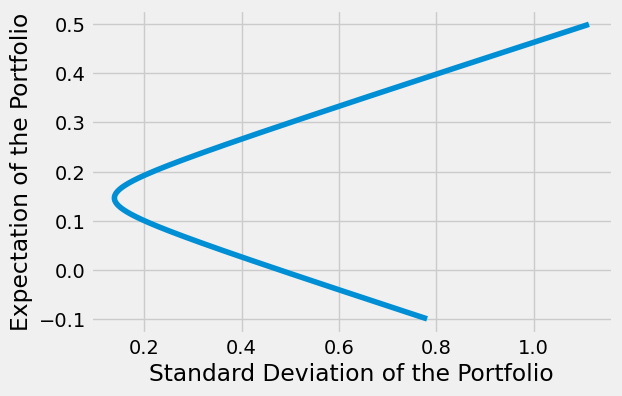

In [117]:
rho = -0.5 # corr between A & B

r_A = 0.1
r_B = 0.3
r_f = 0.05 # risk free asset
sigma_A = 0.2
sigma_B = 0.5
sigma_f = 0 # risk free asset

exp_p = portfolio_expectation(r_A, r_B, sigma_A, sigma_B, weight_A, weight_B, rho)
vol_p = portfolio_variance(r_A, r_B, sigma_A, sigma_B, weight_A, weight_B, rho)

plt.figure(figsize=[6,4])
plt.plot(vol_p, exp_p)
# plt.axhline(y = 0.0 ,color = 'r', linestyle = '--')
plt.xlabel('Standard Deviation of the Portfolio')
plt.ylabel('Expectation of the Portfolio')
plt.show()

In [140]:
def plot_opportunity_set(r_A, r_B, sigma_A, sigma_B, weight_A, weight_B, rho): 
    exp_p = portfolio_expectation(r_A, r_B, sigma_A, sigma_B, weight_A, weight_B, rho)
    vol_p = portfolio_variance(r_A, r_B, sigma_A, sigma_B, weight_A, weight_B, rho)
#     plt.figure(figsize=[6,4])
    plt.plot(vol_p, exp_p)
    # plt.axhline(y = 0.0 ,color = 'r', linestyle = '--')
    plt.xlabel('Standard Deviation of the Portfolio')
    plt.ylabel('Expectation of the Portfolio')
    return [vol_p, exp_p]

## We Now Consider the case that the porfolio include asset A and the risk-free asset.
$$ R_p = w_A \ R_A + w_B \ R_f  $$
$$ \mathbb{E}(R_p) = w_A \ \mathbb{E}(R_A) + w_B \ \mathbb{E}(R_f) $$
$$ \mathbb{Var}(R_p) = w_A^2 \ \mathbb{Var}(R_A)  $$
, as the variance of risk free asset is 0.

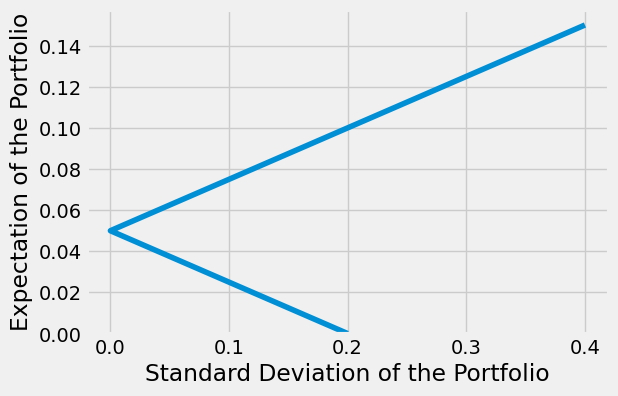

In [119]:
r_A = 0.1
# r_B = 0.3
r_f = 0.05 # risk free asset
sigma_A = 0.2
# sigma_B = 0.5
sigma_f = 0 # risk free asset
# rho = -0.5 # corr between A & B

exp_p = portfolio_expectation(r_A, r_f, sigma_A, sigma_f, weight_A, weight_B, rho=0)
vol_p = portfolio_variance(r_A, r_f, sigma_A, sigma_f, weight_A, weight_B, rho=0)

plt.figure(figsize=[6,4])
plt.plot(vol_p, exp_p)
# plt.axhline(y = 0.0 ,color = 'r', linestyle = '--')
plt.xlabel('Standard Deviation of the Portfolio')
plt.ylabel('Expectation of the Portfolio')
plt.ylim(0)
plt.show()

## Multi-lines

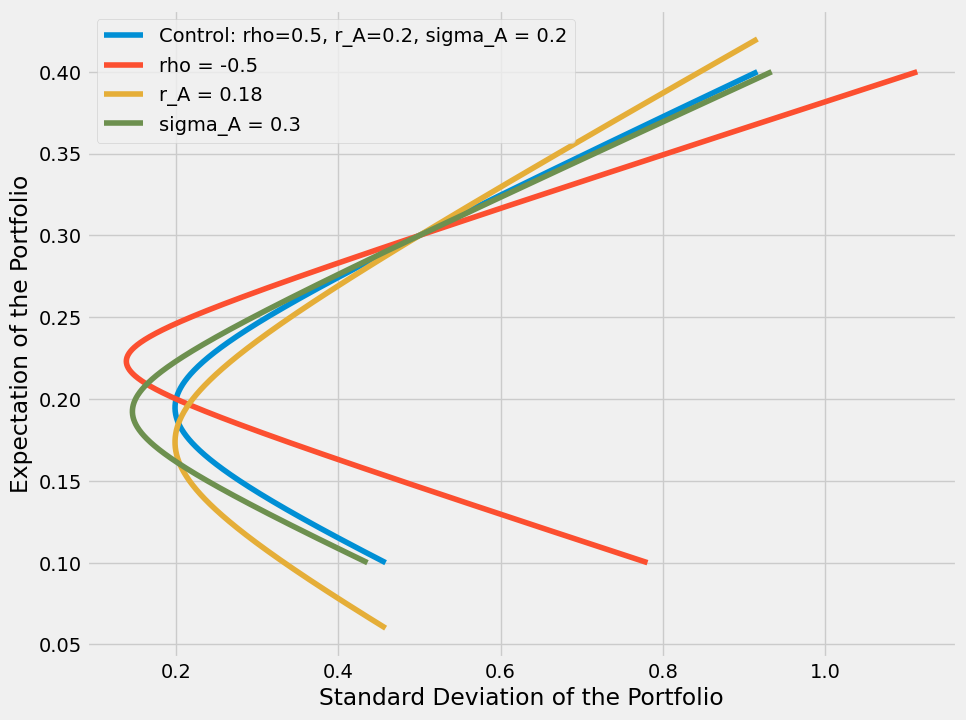

In [122]:
plt.figure(figsize=[10,8])
plot_opportunity_set(r_A=0.2, r_B=0.3, sigma_A=0.2, sigma_B=0.5, weight_A=weight_A, weight_B=weight_B, rho = 0.5)
plot_opportunity_set(r_A=0.2, r_B=0.3, sigma_A=0.2, sigma_B=0.5, weight_A=weight_A, weight_B=weight_B, rho = -0.5)
plot_opportunity_set(r_A=0.18, r_B=0.3, sigma_A=0.2, sigma_B=0.5, weight_A=weight_A, weight_B=weight_B, rho = 0.5)
plot_opportunity_set(r_A=0.2, r_B=0.3, sigma_A=0.15, sigma_B=0.5, weight_A=weight_A, weight_B=weight_B, rho = 0.5)
plt.legend(['Control: rho=0.5, r_A=0.2, sigma_A = 0.2','rho = -0.5','r_A = 0.18', 'sigma_A = 0.3'])

We find the Global Minimum S.D. point get smaller as:
1. $\rho$ becomes smaller
2. $\sigma$ become smaller

$r$ only affect the vertical level to the Global Minimum Point.

If $r$ and $\sigma$ are fixed, $\rho$ affect the shape.

## Import the Risk-Free Asset

$$slope = \frac{y-y^*}{x-x^*}$$
In our case, 

$$slope = \frac{r_p - r_f}{\sigma_p - \sigma_f}=\frac{r_p - r_f}{\sigma_p}$$

- Now, we construct a complete portfolio, by choosing $w$ portion of risky portfolio 'p', and the risk-free asset.

$$ r_{\pi} = r_f + w (r_p - r_f)$$
$$ \sigma_{\pi} = w \sigma_p $$

We can solve that $w = \frac{\sigma_{\pi}}{\sigma_p}$
$$ r_{\pi} = r_f + \frac{ r_p - r_f }{\sigma_p} \sigma_{\pi}$$

Here, we also get the Sharpe Ratio,

$$Sharpe Ratio = \frac{ r_p - r_f }{\sigma_p}$$

x=0.28306087117459994, y=0.25555555555555554, the slope = 0.2315952582337635


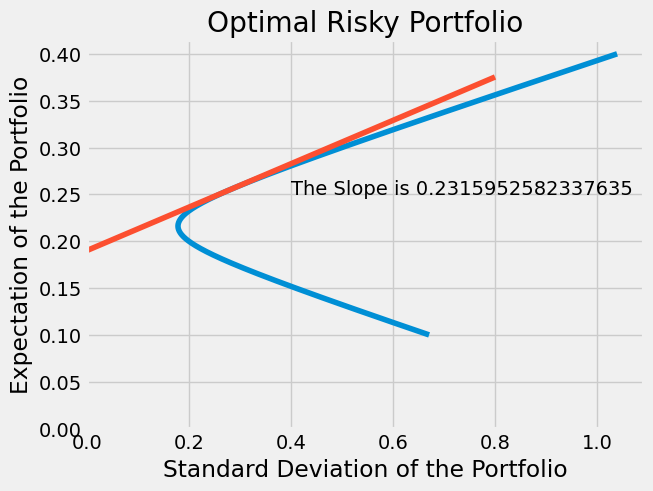

In [196]:
r_f = 0.19
temp = np.c_[plot_opportunity_set(r_A=0.2, r_B=0.3, sigma_A=0.2, sigma_B=0.5, weight_A=weight_A, weight_B=weight_B, rho = -0.1)]
slope = (temp[1]-r_f)/temp[0]
plt.plot(np.linspace(0,0.8,1000), r_f + slope.max()*np.linspace(0,0.8,1000))
plt.xlim(0)
plt.ylim(0)
plt.title('Optimal Risky Portfolio')
plt.text(x=0.4,y=0.25, s = f'The Slope is {slope.max()}')
print(f'x={ temp[0][slope.argmax()] }, y={temp[1][slope.argmax()]}, the slope = {slope.max()}')


# N Risky Assets and One Risk Free

$$w_i = \frac{Asset_i}{\sum Asset_i}$$

$$W = [w_1, w_2, ... , w_N]^T$$

$$\mathbb{1}_N = [1,1,...,1]^T$$

$$W^T\cdot \mathbb{1}_N = \sum^N w_i$$

- Expectation and Variance

$$ \mathbb{E}(r_p) = \sum w_i \mathbb{E}(r_i) = \sum w_i \mu_i $$

$$ \mathbb{E}(r_p) = W^T \vec{\mu} $$

$$ \mathbb{S.D.}(r_p) = \sqrt{  \sum_i^N \sum_j^N w_i w_j \mathbb{Cov}(r_i, r_j)  } $$

$$ \mathbb{Var}(r_p) =   \sum_i^N \sum_j^N w_i w_j \mathbb{Cov}(r_i, r_j)  $$

, by seperating the cross terms and squared terms,

$$ \mathbb{Var}(r_p) =  \sum_i w_i^2 \mathbb{Var}(r_i) + \sum_{i\neq j} w_i w_j \mathbb{Cov}(r_i, r_j)  $$

$$ \mathbb{Var}(r_p) = {  \sum_i w_i^2 \sigma_i^2 + \sum_{i\neq j} w_i w_j \rho \sigma_i \sigma_j  } $$

$$ \mathbb{Var}(r_p) = \vec{W}^T \Sigma \vec{W} $$

, where $\vec{\mu}$ is a vector of mean, $\Sigma$ is the covariance matrix.

-----
E.G.

$$
\Sigma = 
\begin{pmatrix}
\sigma_A^2 & \rho \sigma_A \sigma_B \\ 
 \rho \sigma_A \sigma_B  & \sigma_B^2
\end{pmatrix}
$$

$$\vec{W} = \begin{pmatrix}  w_A \\ w_B \end{pmatrix}$$

$$\vec{W}^T \Sigma \vec{W} =\begin{pmatrix}  w_A & w_B \end{pmatrix} \begin{pmatrix}
\sigma_A^2 & \rho \sigma_A \sigma_B \\ 
 \rho \sigma_A \sigma_B  & \sigma_B^2
\end{pmatrix}  \begin{pmatrix}  w_A \\ w_B \end{pmatrix}$$

$$\mathbb{r_p} = \sigma_p = \sqrt{ \vec{W}^T \Sigma \vec{W} }$$

# Optimisation

Controlling returns, minimise risks,
$$ \min_{\vec{W}} \sigma^2_p$$
$$s.t. \mathbb{E}(r_p)\geq Target,\quad \vec{W}^T \mathbb{1}_N = 1 $$

-----
Controlling risks, minimise returns,
$$ \max_{\vec{W}} \mathbb{E}(r_p) $$
$$s.t. \sigma_p^2 \leq Target,\quad \vec{W}^T \mathbb{1}_N = 1 $$

-----
While Including the Risk Aversion of Investors,
$$ \max_{\vec{W}} \mathbb{E}(r_p) - \frac{\lambda}{2}\sigma^2_p$$
$$s.t.  \vec{W}^T \mathbb{1}_N = 1 $$
